<a href="https://colab.research.google.com/github/M11316014/Colab/blob/main/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92(%E6%9C%9F%E6%9C%AB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 匯入套件
import pandas as pd  # 用於資料處理
import seaborn as sns  # 繪圖套件
import numpy as np  # 數值運算
import matplotlib.pyplot as plt  # 畫圖
from matplotlib import dates  # 處理日期格式
from datetime import datetime  # 處理日期與時間

In [ ]:
# 載入資料集
data = pd.read_csv('/content/drive/MyDrive/Walmart_Store_sales.csv')  # 讀取CSV檔案
data  # 顯示資料內容

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
# 將日期欄位轉換為 datetime 格式，並顯示資料集資訊
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')  # 將 Date 欄位轉為 datetime 格式
data.info()  # 查看資料摘要

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [ ]:
# 檢查是否有缺失值
data.isnull().sum()  # 顯示每個欄位的缺失值數量

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [ ]:
# 拆解日期欄位，新增日、月、年欄位
data["Day"] = pd.DatetimeIndex(data['Date']).day  # 新增 Day 欄位
data['Month'] = pd.DatetimeIndex(data['Date']).month  # 新增 Month 欄位
data['Year'] = pd.DatetimeIndex(data['Date']).year  # 新增 Year 欄位
data  # 顯示更新後的資料

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [ ]:
# 移除異常值（Outliers）
# 只保留失業率在 4.5 和 10 之間，且氣溫大於 10 的資料
data_new = data[(data['Unemployment'] < 10) & (data['Unemployment'] > 4.5) & (data['Temperature'] > 10)]
data_new  # 顯示篩選後的資料

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [ ]:
# 匯入 sklearn 套件
from sklearn.ensemble import RandomForestRegressor  # 隨機森林回歸
from sklearn.model_selection import train_test_split  # 資料切分
from sklearn import metrics  # 模型評估
from sklearn.linear_model import LinearRegression  # 線性回歸
from sklearn.ensemble import GradientBoostingRegressor  # 梯度提升回歸

# 選擇特徵欄位與目標欄位
X = data_new[['Store','Fuel_Price','CPI','Unemployment','Day','Month','Year']]  # 特徵欄位
y = data_new['Weekly_Sales']  # 預測目標：每週銷售額

# 將資料分為訓練集和測試集，比例為80%訓練，20%測試
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Linear Regression:

Accuracy: 12.523010629892806
Mean Absolute Error: 464764.0435330761
Mean Squared Error: 310560627118.51154
Root Mean Squared Error: 557279.6668805633


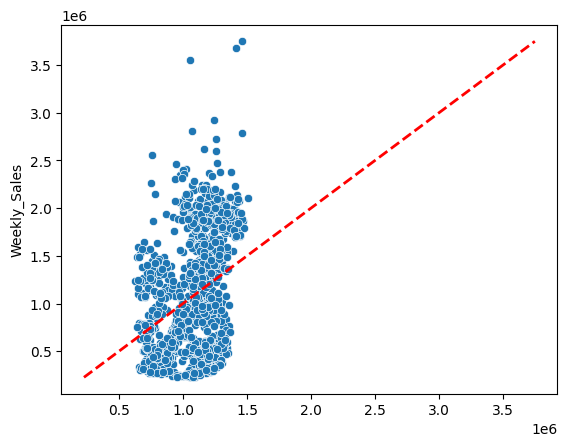

In [ ]:
# 線性迴歸模型
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, y_train)*100)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.scatterplot(x=y_pred, y=y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)

Random Forest Regressor:

Accuracy: 95.50127097013478
Mean Absolute Error: 62871.90007511884
Mean Squared Error: 16326890619.014832
Root Mean Squared Error: 127776.72174153957


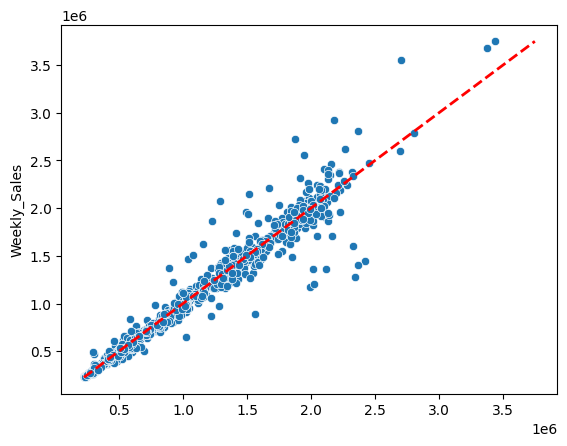

In [ ]:
# 隨機森林迴歸模型
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, y_test)*100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


sns.scatterplot(x=y_pred, y=y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)

Gradient Boosting Regressor:

Accuracy: 98.06685035259297
Mean Absolute Error: 50822.31438172491
Mean Squared Error: 7015831056.698997
Root Mean Squared Error: 83760.55788197089


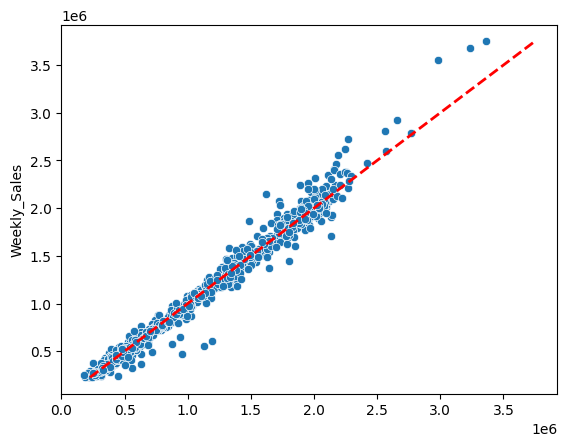

In [ ]:
# 梯度提升迴歸模型
print('Gradient Boosting Regressor:')
print()

gbr = GradientBoostingRegressor(n_estimators=400, max_depth=5)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

print('Accuracy:', gbr.score(X_test, y_test) * 100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# 散佈圖視覺化預測 vs 實際
sns.scatterplot(x=y_pred, y=y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)